## Connect to the Spotify API
Gather these playlists

In [94]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import credentials
import pandas as pd

Spotify has a list of playlists that pertain to a certian mood. This can be found at https://open.spotify.com/genre/0JQ5DAqbMKFzHmL4tf05da

In [95]:
# Connect to the Spotify API
auth_manager = SpotifyClientCredentials(client_id=credentials.SPOTIPY_CLIENT_ID, client_secret=credentials.SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

#

# Feeling Happy
happy_ids = ["37i9dQZF1DX3rxVfibe1L0","37i9dQZF1DX7KNKjOK0o75","37i9dQZF1DWYBO1MoTDhZI","37i9dQZF1DX4fpCWaHOned",
    "37i9dQZF1DWSf2RDTDayIx","37i9dQZF1DX9XIFQuFvzM4","37i9dQZF1DX2sUQwD7tbmL","37i9dQZF1DX1BzILRveYHb"]
sad_ids = ["37i9dQZF1DX7qK8ma5wgG1","37i9dQZF1DX3YSRoSdA634","37i9dQZF1DX59NCqCqJtoH","37i9dQZF1DX64Y3du11rR1",
    "37i9dQZF1DX6xZZEgC9Ubl","37i9dQZF1DWW2hj3ZtMbuO","37i9dQZF1DWX83CujKHHOn","37i9dQZF1DX15JKV0q7shD"]
romantic_ids = ["37i9dQZF1DX5IDTimEWoTd","37i9dQZF1DXbEm2sKzgoJ8","37i9dQZF1DX6mvEU1S6INL","37i9dQZF1DWTbzY5gOVvKd",
    "37i9dQZF1DX38lOuCWlLV1","37i9dQZF1DWSRc3WJklgBs","37i9dQZF1DXcbAIldMQMIs","37i9dQZF1DWXqpDKK4ed9O","37i9dQZF1DX8WMG8VPSOJC"]
party_ids = ["37i9dQZF1DXa2PvUpywmrr","37i9dQZF1DX8ky12eWIvcW","37i9dQZF1DWY4xHQp97fN6","37i9dQZF1DXaXB8fQg7xif",
   "37i9dQZF1DWY7IeIP1cdjF", "37i9dQZF1DWZCdOD1jAvLL","37i9dQZF1DX5I05jXm1F2M","37i9dQZF1DX0VfLbJWWGKr"]

In [50]:
username = 'spotify'
results = sp.user_playlist_tracks(username, "37i9dQZF1DX3rxVfibe1L0")
print(results['items'][0]['track']['artists'][0]['uri'])
#print(results)

spotify:artist:5YGY8feqx7naU7z4HrwZM6


In [71]:
def create_df(mood_ids):
    playlist_features_list = ["name","tracks","artists",'avg_danceability', 'avg_energy',
        'avg_loudness', 'avg_acousticness', 'avg_instrumentalness','avg_liveness', 'avg_valence' ,'avg_tempo']
    playlists = pd.DataFrame(columns = playlist_features_list)

    for p in range(len(mood_ids)):
        # get the tracks and artists
        playlist_tracks = []
        artists = []
        tracks_raw = sp.user_playlist_tracks(username, mood_ids[p])
        for i in range(len(tracks_raw)):
            song_id = tracks_raw['items'][i]['track']['uri']
            song_id = song_id.replace("spotify:track:", "")
            playlist_tracks.append(song_id)
            artist_id = tracks_raw['items'][i]['track']['artists'][0]['uri']
            artist_id = artist_id.replace("spotify:artist:", "")
            artists.append(artist_id)
        
        audio_features = []
        # Loop through every track in the playlist, extract features and append the features to the playlist df
        for track in playlist_tracks:
            # Get audio features
            audio_features.append(sp.audio_features(track))
        audio_keys = []
        for d in audio_features[0]:
            audio_keys.extend(d.keys())
        audio_features_df = pd.DataFrame(audio_features[0], columns = audio_keys)
        for x in range(1, len(audio_features)):
            audio_features_df_single = pd.DataFrame(audio_features[x], columns = audio_keys)
            audio_features_df = pd.concat([audio_features_df, audio_features_df_single], ignore_index = True)

        # take the lists and make them into a strong
        artists = ' '.join(artists)
        playlist_tracks = ' '.join(playlist_tracks)

        playlist_data = {'name': mood_ids[p],
            'tracks': playlist_tracks,
            'artists': artists,
            'avg_danceability': audio_features_df['danceability'].mean(),
            'avg_energy':audio_features_df['energy'].mean(),
        'avg_loudness': audio_features_df['loudness'].mean(),
            'avg_acousticness': audio_features_df['acousticness'].mean(), 
            'avg_instrumentalness': audio_features_df['instrumentalness'].mean(),
            'avg_liveness': audio_features_df['liveness'].mean(),
            'avg_valence' : audio_features_df['valence'].mean() ,
            'avg_tempo':  audio_features_df['tempo'].mean()}
        playlist_df = pd.DataFrame(playlist_data, index = [0])

        playlists = pd.concat([playlists, playlist_df], axis = 0, ignore_index = True)
    return playlists

### Create the playlist dataframes

In [72]:
happy_playlists = create_df(happy_ids)
sad_playlists = create_df(sad_ids)
romantic_playlists = create_df(romantic_ids)
party_playlists = create_df(party_ids)

In [73]:
happy_playlists.head()

,name,tracks,artists,avg_danceability,avg_energy,avg_loudness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo
0,37i9dQZF1DX3rxVfibe1L0,0yLdNVWF3Srea0uzk55zFn 4uUG5RXrOk84mYEfFvj3cK ...,5YGY8feqx7naU7z4HrwZM6 1Cs0zKBU1kc0i8ypK3B9ai ...,0.668857,0.722143,-4.767143,0.285090,0.000348,0.165986,0.637857,130.447571
1,37i9dQZF1DX7KNKjOK0o75,4RvWPyQ5RL0ao9LPZeSouE 1mea3bSkSGXuIRvnydlB5b ...,4bthk9UfsYUYdcFyqxmSUU 4gzpq5DPGxSnKTe4SA8HAU ...,0.539143,0.767429,-9.074143,0.204659,0.018166,0.197914,0.617429,121.836714
2,37i9dQZF1DWYBO1MoTDhZI,3YJJjQPAbDT7mGpX3WtQ9A 0JXXNGljqupsJaZsgSbMZV ...,7tYKF4w9nC0nq9CsPZTHyP 360IAlyVv4PCEVjgyMZrxK ...,0.687143,0.693143,-5.904857,0.113829,0.000050,0.309386,0.552429,106.641857
3,37i9dQZF1DX4fpCWaHOned,4nrPB8O7Y7wsOCJdgXkthe 4uUG5RXrOk84mYEfFvj3cK ...,716NhGYqD1jl2wI1Qkgq36 1Cs0zKBU1kc0i8ypK3B9ai ...,0.722714,0.655714,-5.087571,0.106386,0.000005,0.140957,0.555429,126.760429
4,37i9dQZF1DWSf2RDTDayIx,6zSpb8dQRaw0M1dK8PBwQz 39JofJHEtg8I4fSyo7Imft ...,3PhoLpVuITZKcymswpck5b 4XC335ouK6pXyq4QiIb8bP ...,0.702857,0.798143,-5.167143,0.064114,0.084132,0.196343,0.704429,125.982143


In [74]:
sad_playlists.head()

,name,tracks,artists,avg_danceability,avg_energy,avg_loudness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo
0,37i9dQZF1DX7qK8ma5wgG1,5hnGrTBaEsdukpDF6aZg8a 4VtRHZ4tBDHaWltVAytlLY ...,3QSQFmccmX81fWCUSPTS7y 6WFDpw4u23uSpon4BHvFRn ...,0.458143,0.445429,-7.564286,0.564429,0.000152,0.120257,0.329857,113.569857
1,37i9dQZF1DX3YSRoSdA634,3JvKfv6T31zO0ini8iNItO 0nJW01T7XtvILxQgC5J7Wh ...,2txHhyCwHjUEpJjWrEyqyX 0du5cEVh5yTK9QJze8zA0C ...,0.529429,0.439429,-7.783429,0.610471,0.000009,0.126000,0.413429,101.612571
2,37i9dQZF1DX59NCqCqJtoH,5Y35SjAfXjjG0sFQ3KOxmm 6xGruZOHLs39ZbVccQTuPZ ...,7tYKF4w9nC0nq9CsPZTHyP 3MZsBdqDrRTJihTHQrO6Dq ...,0.460857,0.316857,-10.867429,0.734857,0.140068,0.144857,0.219600,146.565714
3,37i9dQZF1DX64Y3du11rR1,5K17WcyVoqa4lugxn5RcxP 6Cvti10W0AzmzG9D1tpuKp ...,0A6NReVqiHGQlKWIpriTO3 38SWPOPO1YqxUPnT4AAoID ...,0.523714,0.219229,-10.197571,0.865143,0.000008,0.115871,0.300286,119.834857
4,37i9dQZF1DX6xZZEgC9Ubl,4sx6NRwL6Ol3V6m9exwGlQ 2CxTUwmFIMzGfkxVLVQiFJ ...,2tIP7SsRs7vjIcLrU85W8J 2VDZoCBGjxbHJbnzSX5nP6 ...,0.614571,0.454000,-8.431857,0.248271,0.003846,0.139957,0.268714,105.302143


### Work on some data visualization
Things to test: danceabilty, energy, loudness, acousticness, instrumentalness, liveness, valence, temp

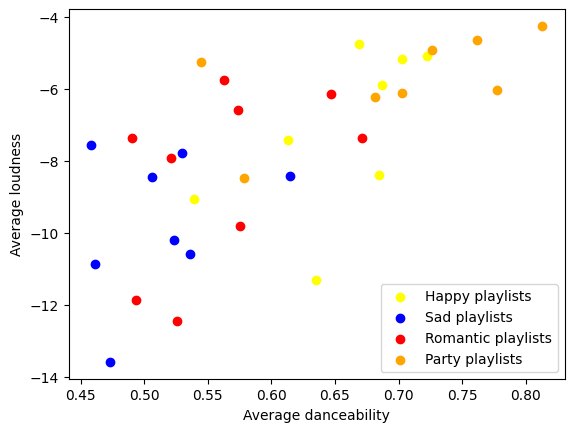

In [78]:
import matplotlib.pyplot as plt
# Define colors for each dataframe
happy_color = 'yellow'
sad_color = 'blue'
romanctic_color = 'red'
party_color = 'orange'

# Create the scatter plot
plt.scatter(happy_playlists['avg_danceability'], happy_playlists['avg_loudness'], c=happy_color, label='Happy playlists')
plt.scatter(sad_playlists['avg_danceability'], sad_playlists['avg_loudness'], c=sad_color, label='Sad playlists')
plt.scatter(romantic_playlists['avg_danceability'], romantic_playlists['avg_loudness'], c=romanctic_color, label='Romantic playlists')
plt.scatter(party_playlists['avg_danceability'], party_playlists['avg_loudness'], c=party_color, label='Party playlists')

# Add axis labels and a legend
plt.xlabel('Average danceability')
plt.ylabel('Average loudness')
plt.legend()

# Set axis limits
#plt.xlim(-1, 1)
#plt.ylim(-10, 10)

# Display the plot
plt.show()

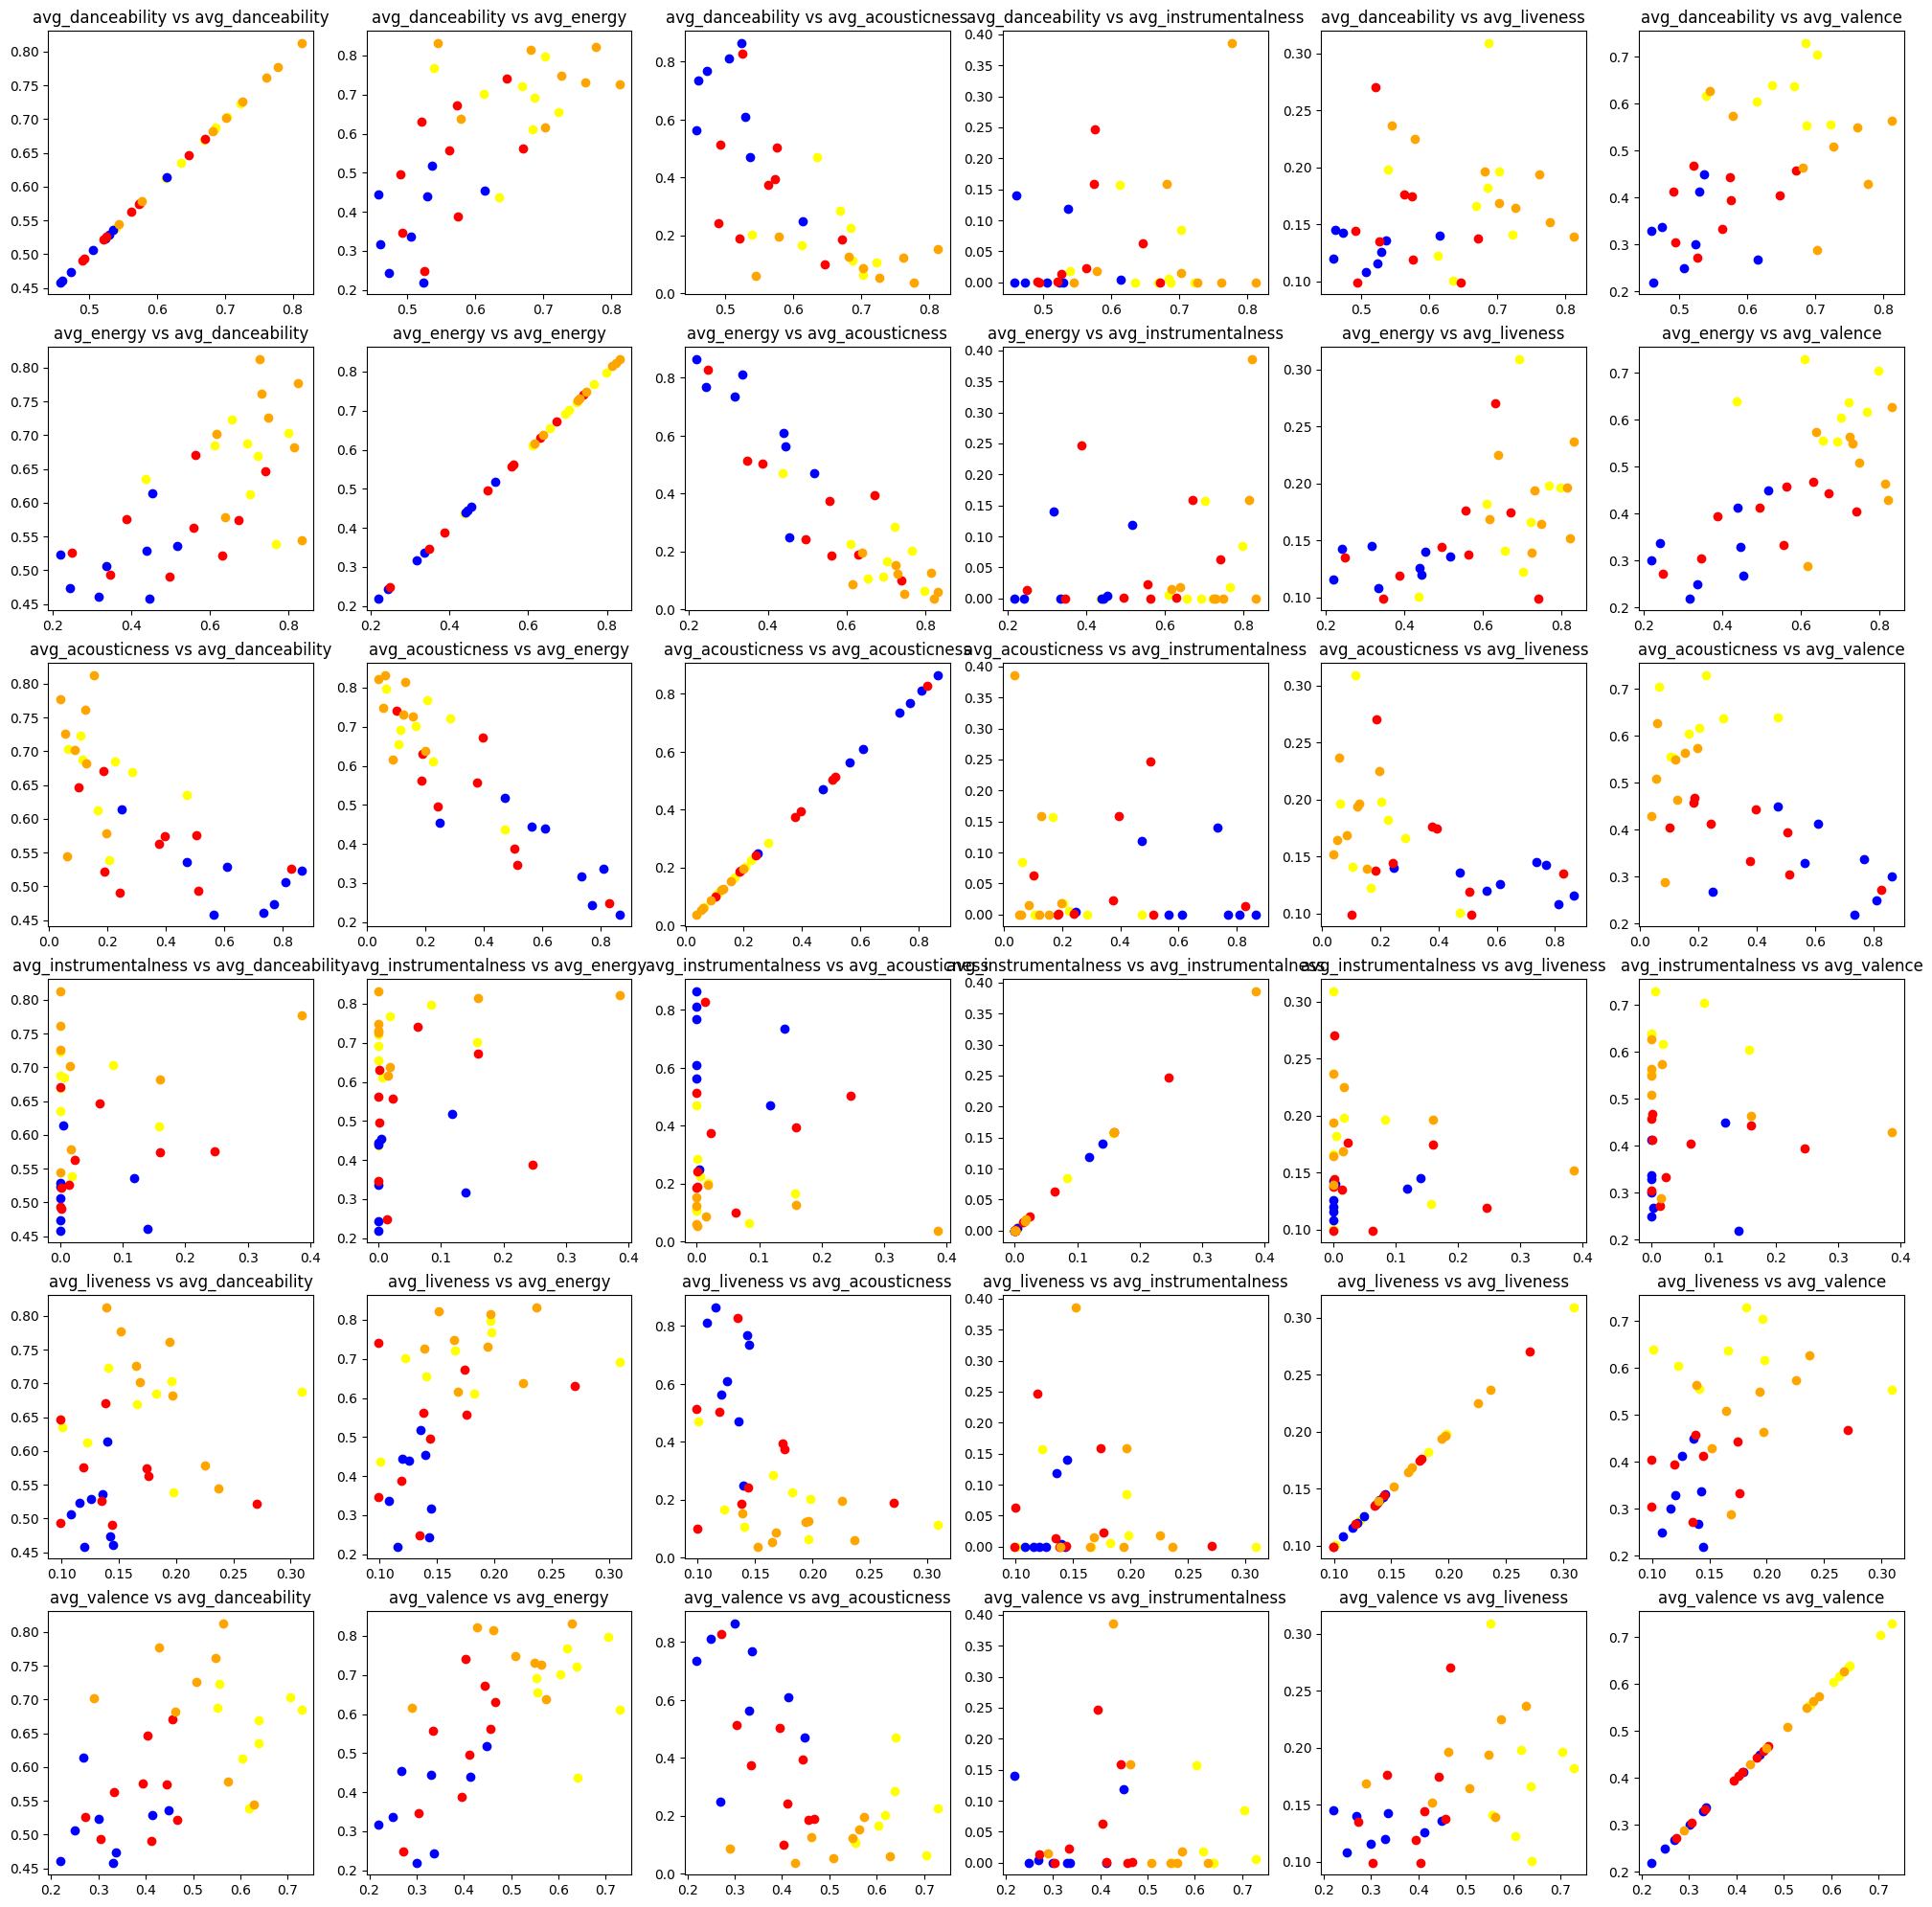

In [83]:
fig, axs = plt.subplots(6, 6)
fig.set_figheight(25)
fig.set_figwidth(25)
vals = ['avg_danceability','avg_energy','avg_acousticness','avg_instrumentalness','avg_liveness','avg_valence','avg_tempo']
for x in range(0,6):
    for y in range(0,6):
        axs[x, y].scatter(happy_playlists[vals[x]], happy_playlists[vals[y]], c=happy_color, label='Happy playlists')
        axs[x, y].scatter(sad_playlists[vals[x]], sad_playlists[vals[y]], c=sad_color, label='Sad playlists')
        axs[x, y].scatter(romantic_playlists[vals[x]], romantic_playlists[vals[y]], c=romanctic_color, label='Romantic playlists')
        axs[x, y].scatter(party_playlists[vals[x]], party_playlists[vals[y]], c=party_color, label='Party playlists')
        title = vals[x] + " vs " + vals[y]
        axs[x, y].set_title(title)

Correlations to explore more into:
- valence & danceability, valence & energy, valence & acoustiness, valence & liveness, liveness & energy
- VALENCE, LIVENESS, ENERGY, acoustiness

Text(0.5, 0, 'Energy')

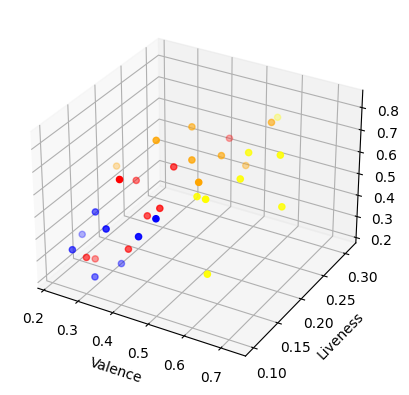

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

vals = ['avg_danceability','avg_energy','avg_acousticness','avg_instrumentalness','avg_liveness','avg_valence','avg_tempo']
ax.scatter(happy_playlists[vals[5]],happy_playlists[vals[4]],happy_playlists[vals[1]],c=happy_color)
ax.scatter(sad_playlists[vals[5]],sad_playlists[vals[4]],sad_playlists[vals[1]],c=sad_color)
ax.scatter(romantic_playlists[vals[5]],romantic_playlists[vals[4]],romantic_playlists[vals[1]],c=romanctic_color)
ax.scatter(party_playlists[vals[5]],party_playlists[vals[4]],party_playlists[vals[1]],c=party_color)



ax.set_xlabel('Valence')
ax.set_ylabel('Liveness')
ax.set_zlabel('Energy')



## Songs
Let's try this with the songs. I don't think this will work at ALL but I might as well try!

In [96]:
def mood_songs(tracks_series):
    # Initialize the list to store all the tracks
    tracks = []

    # Loop over each string in the list and split it into smaller strings
    for string in tracks_series:
        # Split the string into a list of smaller strings
        string_split = string.split()
        # Add the smaller strings to the tracks list
        tracks.extend(string_split)

    audio_features = []
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    for track in tracks:
        # Get audio features
        audio_features.append(sp.audio_features(track))
    audio_keys = []
    for d in audio_features[0]:
        audio_keys.extend(d.keys())
    audio_features_df = pd.DataFrame(audio_features[0], columns = audio_keys)
    for x in range(1, len(audio_features)):
        audio_features_df_single = pd.DataFrame(audio_features[x], columns = audio_keys)
        audio_features_df = pd.concat([audio_features_df, audio_features_df_single], ignore_index = True)
    return audio_features_df

In [98]:
# Print the tracks list
happy_songs = mood_songs(happy_playlists['tracks'])
sad_songs = mood_songs(sad_playlists['tracks'])
romantic_songs = mood_songs(romantic_playlists['tracks'])
party_songs = mood_songs(party_playlists['tracks'])

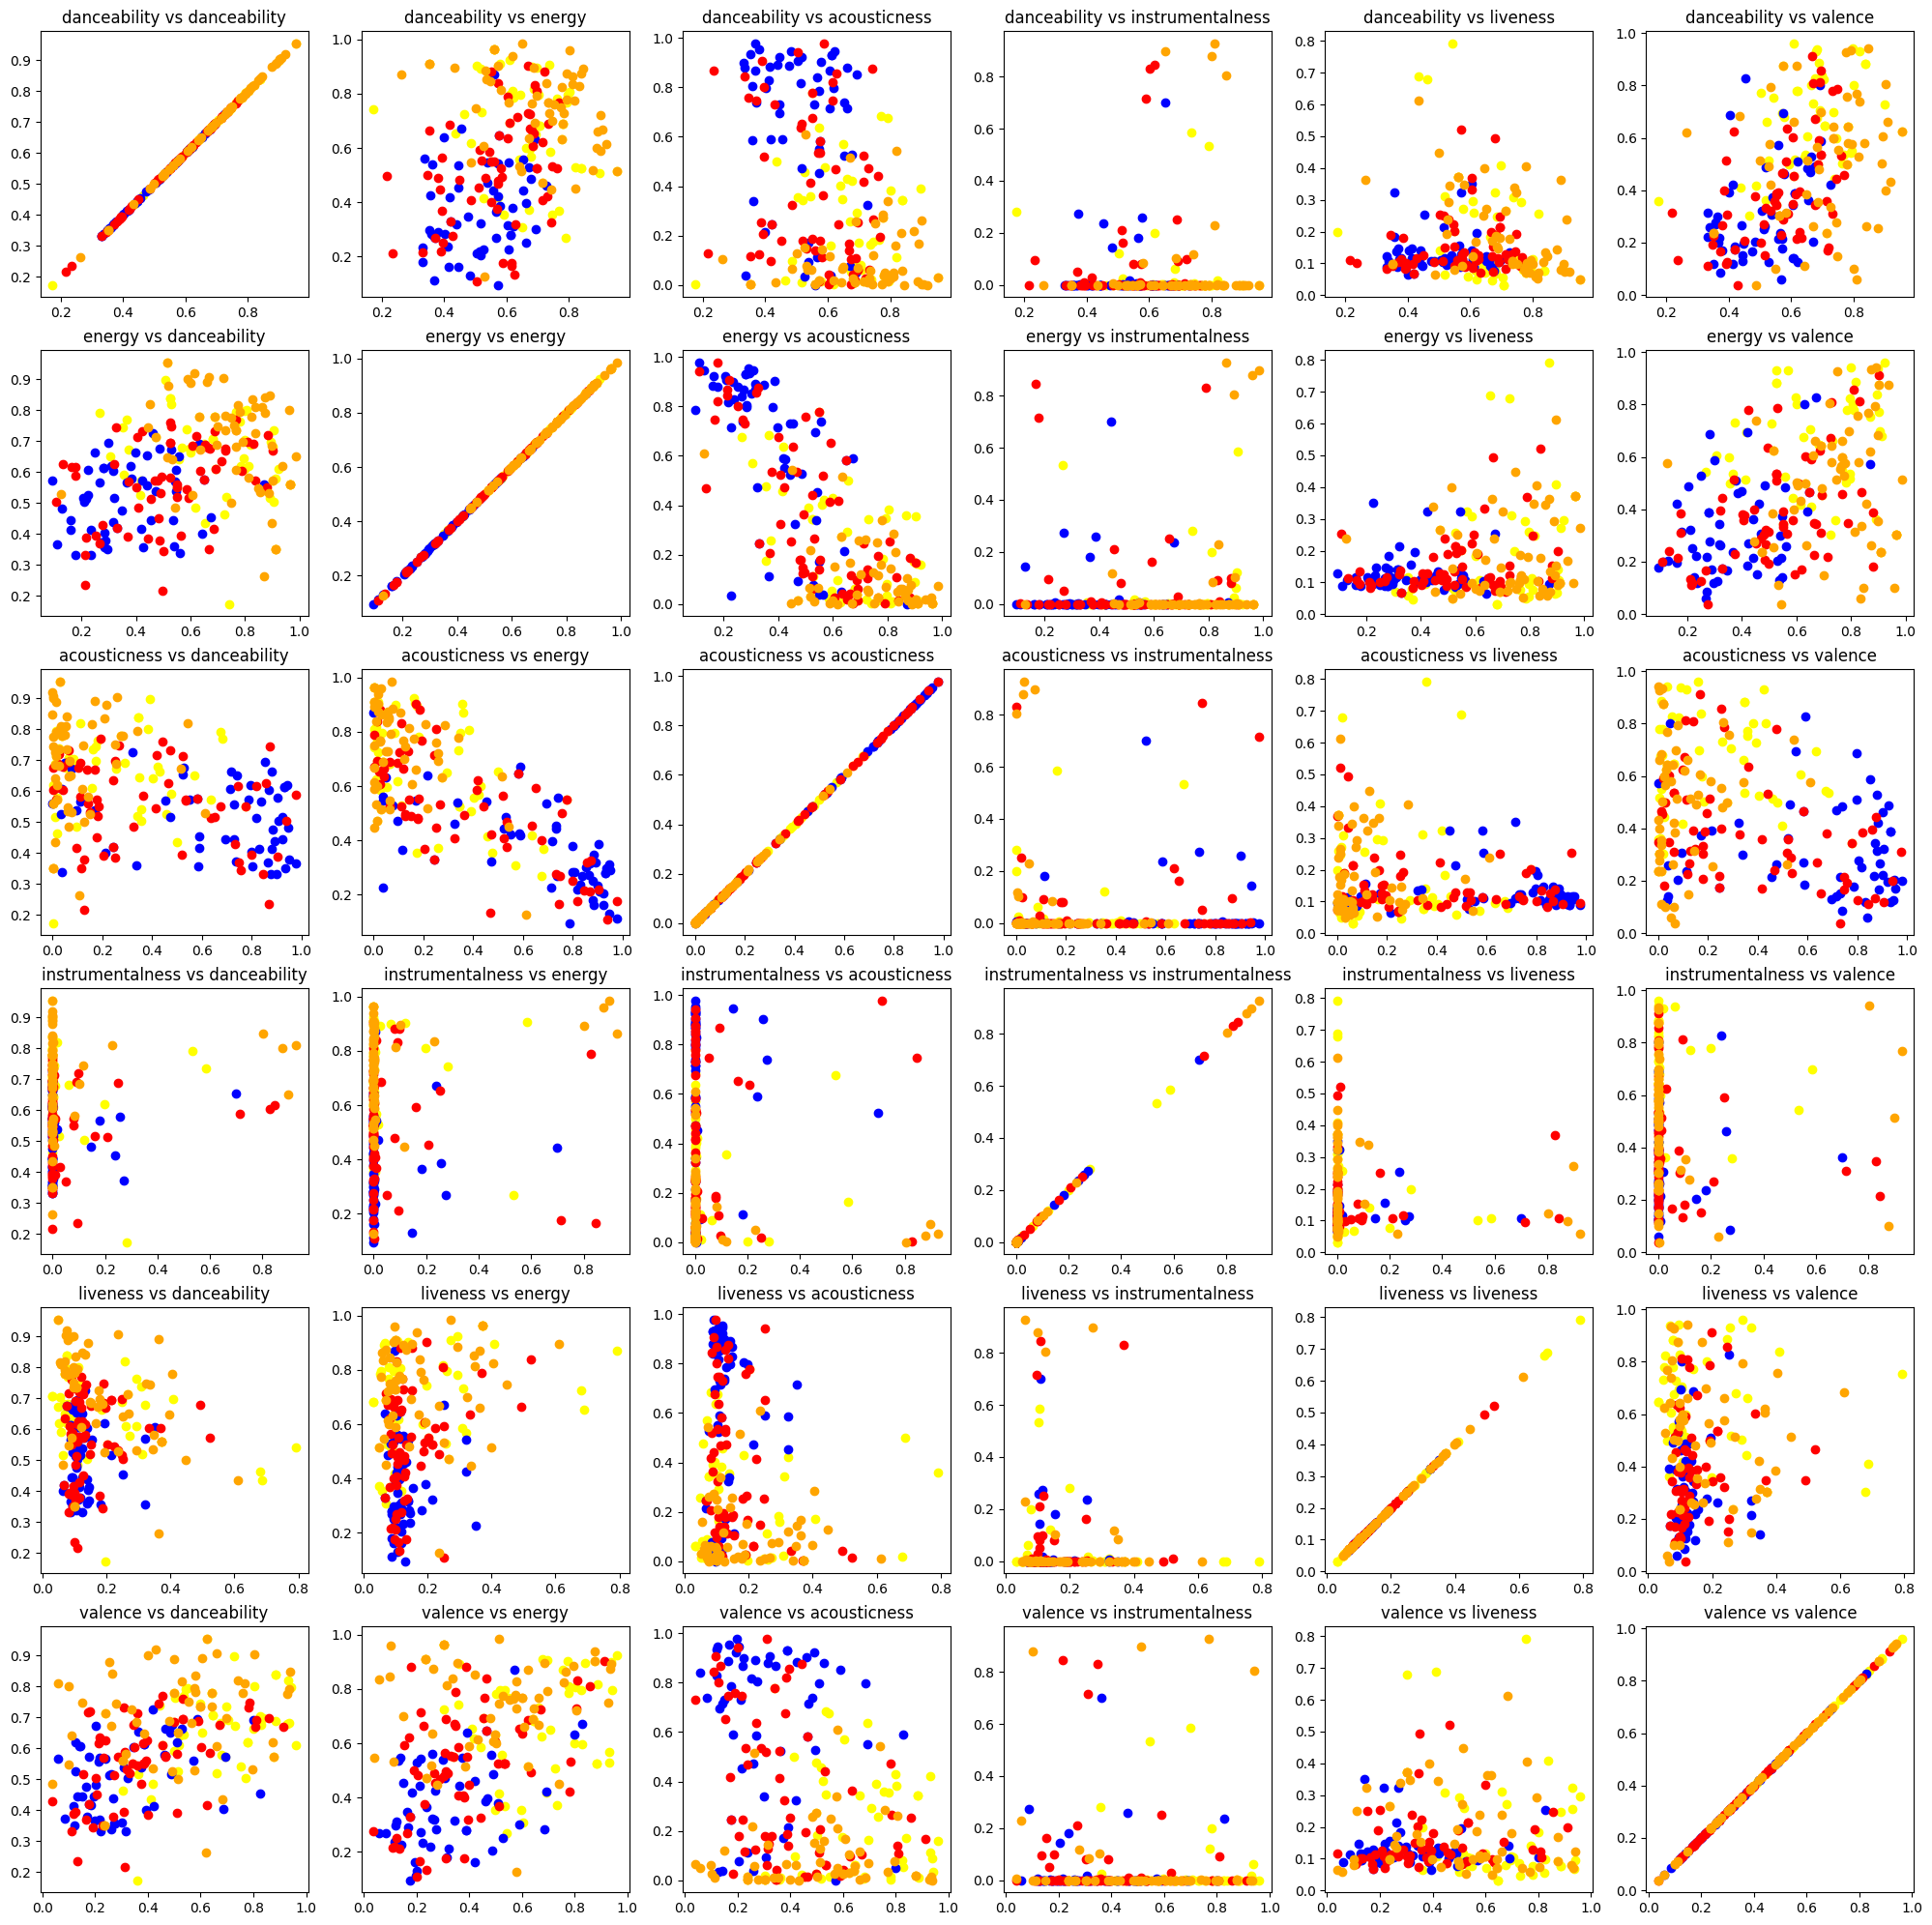

In [101]:
fig, axs = plt.subplots(6, 6)
fig.set_figheight(25)
fig.set_figwidth(25)
vals = ['danceability','energy','acousticness','instrumentalness','liveness','valence','tempo']
for x in range(0,6):
    for y in range(0,6):
        axs[x, y].scatter(happy_songs[vals[x]], happy_songs[vals[y]], c=happy_color, label='Happy songs')
        axs[x, y].scatter(sad_songs[vals[x]], sad_songs[vals[y]], c=sad_color, label='Sad songs')
        axs[x, y].scatter(romantic_songs[vals[x]], romantic_songs[vals[y]], c=romanctic_color, label='Romantic songs')
        axs[x, y].scatter(party_songs[vals[x]], party_songs[vals[y]], c=party_color, label='Party songs')
        title = vals[x] + " vs " + vals[y]
        axs[x, y].set_title(title)

## Takeaways
Okay, clearly just that isn't working and I won't be able to just run a clustering algorithm on that.